In [65]:
# Import Libraries and Dependencies

In [66]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Prepare Data

### Use Pandas to read in each of the CSV files as a DataFrame.

In [67]:
whale_returns_csv = Path("Resources/whale_returns.csv")
algo_returns_csv = Path("Resources/algo_returns.csv")
sp500_history_csv = Path("Resources/sp500_history.csv")

### Convert the dates to a DateTimeIndex.

In [68]:
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)

In [69]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [70]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [71]:
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


### Detect and remove null values for Whale Returns and Algorithmic Trading Returns.

In [72]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [73]:
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [74]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [75]:
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

### Detect and remove null values for S&P 500 Historic Prices.

In [76]:
## Remove dollar signs from the numeric values and convert the data types as needed.
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [77]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [78]:
sp500_history.dtypes

Close    object
dtype: object

In [79]:
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [80]:
sp500_history['Close'] = sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [81]:
sp500_history.isnull().sum()

Close    1
dtype: int64

In [82]:
sp500_history.dropna(inplace=True)
sp500_history.isnull().sum()

Close    0
dtype: int64

### Convert the S&P 500 closing prices to daily returns.

In [83]:
sp500_history = sp500_history.rename(columns={
    "Close": "S & P 500"
})
sp500_history.head()

,S & P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


### Combine Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

In [84]:
combined_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
combined_returns.sort_index(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

## Performance Analysis

### Calculate and plot cumulative returns. 

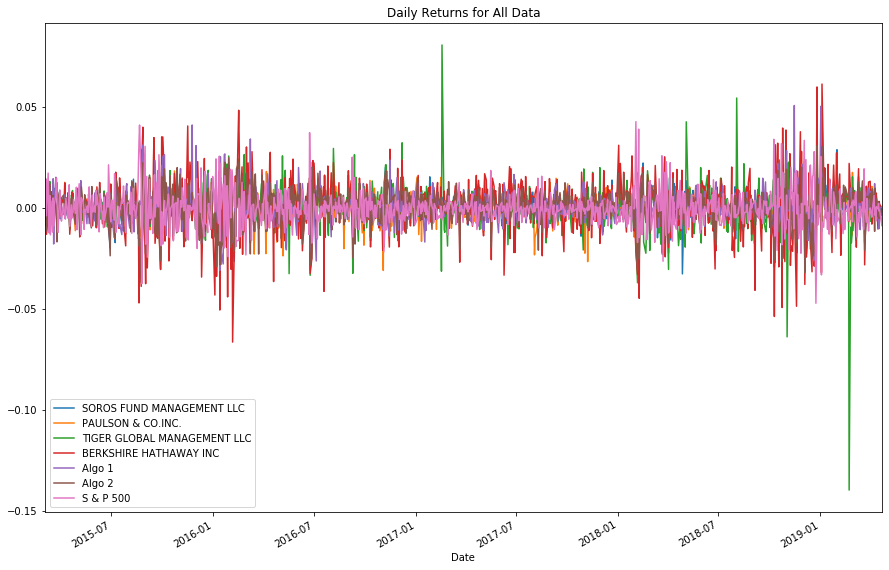

In [85]:
combined_returns.plot(figsize=(15,10), title=('Daily Returns for All Data'))

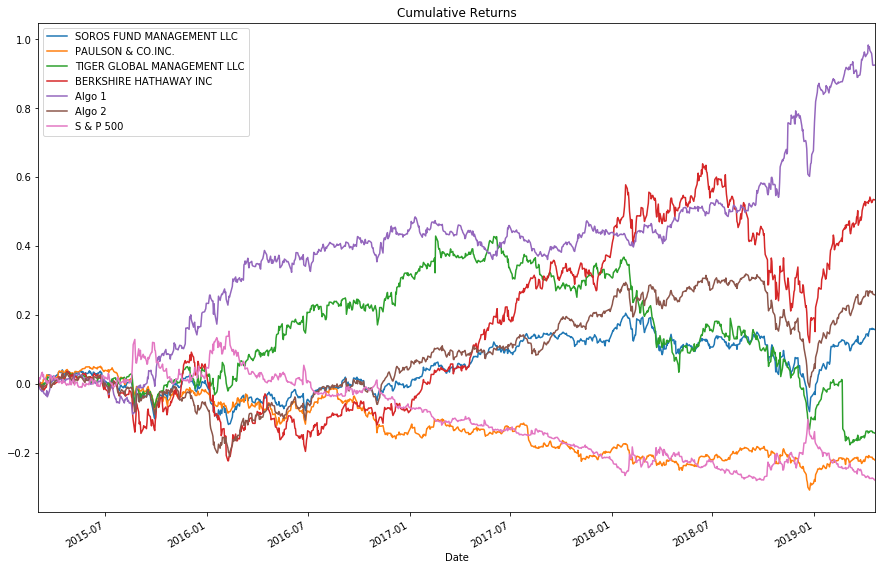

In [86]:
cumlative_returns = (1 + combined_returns).cumprod() -1
cumlative_returns.plot(figsize=(15,10), title='Cumulative Returns')

## Risk Analysis

### Create a box plot for each of the returns. 

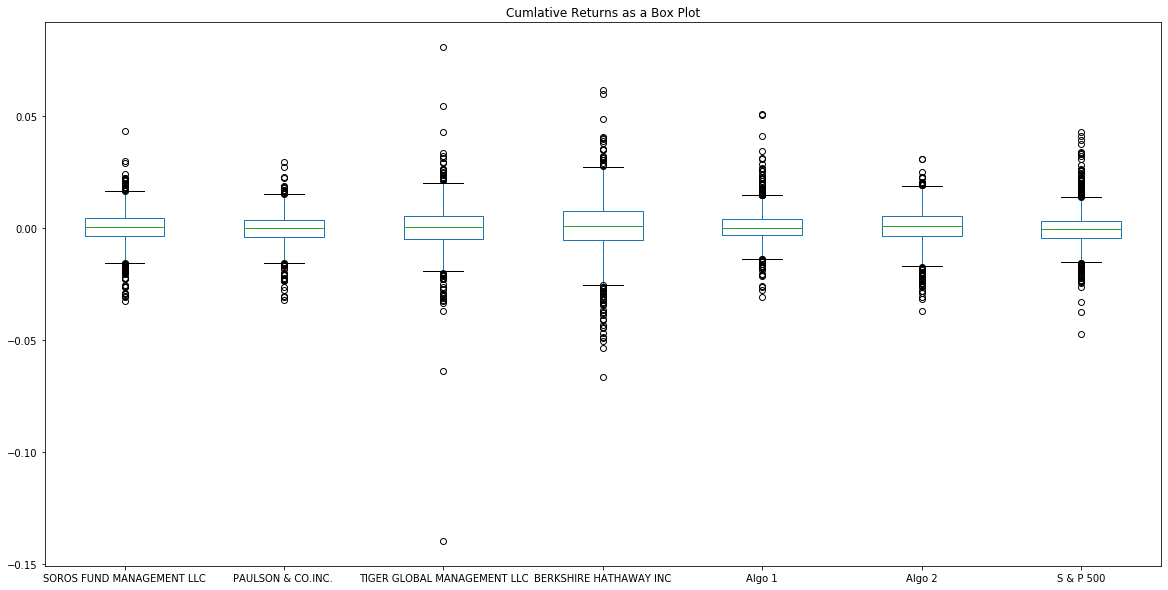

In [87]:
combined_returns.plot.box(figsize=(20,10), title='Cumlative Returns as a Box Plot')

### Calculate the standard deviation for each portfolio.

In [88]:
daily_std = combined_returns.std()
daily_std.sort_values()

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S & P 500                      0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Which portfolios are riskier than the S&P 500?

### Annualized Standard Deviation

In [89]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S & P 500                      0.136313
dtype: float64

## Rolling Statistics

### Plot the rolling standard deviation of the firm's portfolios along with the rolling standard deviation of the S&P 500. 

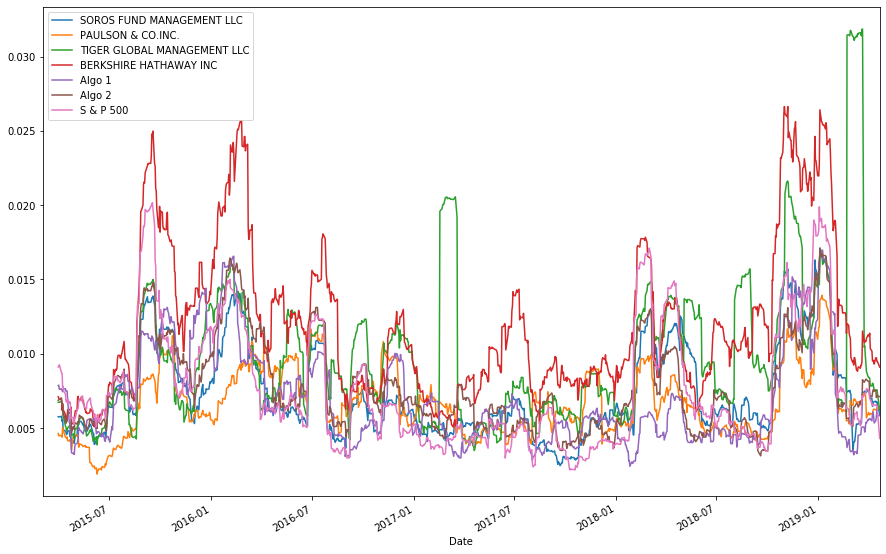

In [90]:
combined_returns.rolling(window=21).std().plot(figsize=(15,10))

### Construct a correlation table for the algorithmic, whale, and S&P 500 returns. 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S & P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


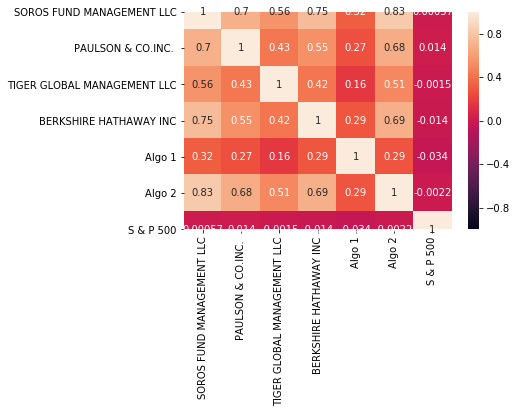

In [91]:
import seaborn as sns
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation

### Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. 

In [92]:
covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns['S & P 500'])
covariance

-1.4081131271818174e-07

In [93]:
variance = combined_returns['S & P 500'].var()
variance

7.373467552840441e-05

In [94]:
beta = covariance / variance
beta

-0.0019097027512372758

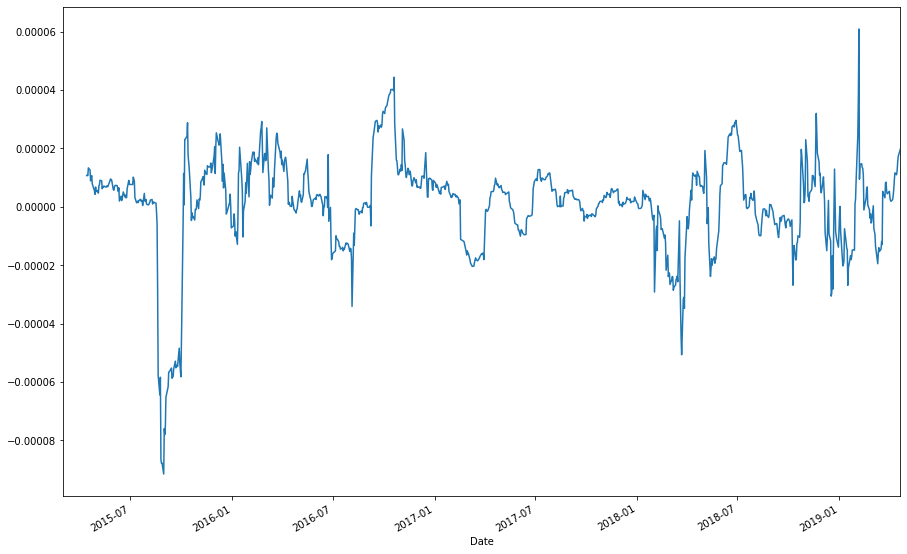

In [95]:
rolling_covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(combined_returns['S & P 500'])
rolling_covariance.plot(figsize=(15, 10))

# Plot Sharpe Ratios

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.

In [96]:
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S & P 500                     -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

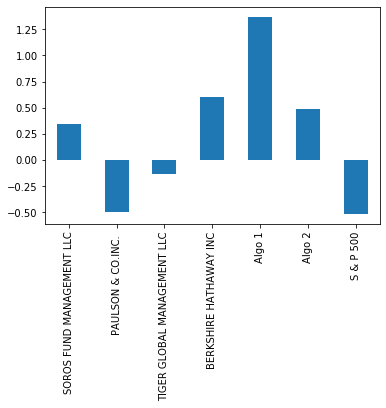

In [97]:
sharpe_ratios.plot.bar()

# MY PORTFOLIO RETURNS

### Set the File Path to the CSVs using the Pathlib Library

In [202]:
amazon = Path("Resources/amzn_historical.csv")
facebook = Path("Resources/fb_historical.csv")
tesla = Path("Resources/tsla_historical.csv")

### Import the CSVs as Pandas DataFrames

In [203]:
amazon_df = pd.read_csv(amazon, index_col="Date", parse_dates=True, infer_datetime_format=True)
facebook_df = pd.read_csv(facebook, index_col="Date", parse_dates=True, infer_datetime_format=True)
tesla_df = pd.read_csv(tesla, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [204]:
amazon_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,"$1,869.44",3446381,"$1,885.88","$1,887.11","$1,858.55"
2020-01-13,"$1,891.30",2785844,"$1,891.31","$1,898","$1,880.80"
2020-01-10,"$1,883.16",2856959,"$1,905.37","$1,906.94","$1,880"
2020-01-09,"$1,901.05",3174962,"$1,909.89","$1,917.82","$1,895.80"
2020-01-08,"$1,891.97",3511966,"$1,898.04","$1,911.00","$1,886.44"


In [205]:
amazon_df[' Close/Last'] = amazon_df[' Close/Last'].str.replace('$', '')
amazon_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,"1,869.44",3446381,"$1,885.88","$1,887.11","$1,858.55"
2020-01-13,"1,891.30",2785844,"$1,891.31","$1,898","$1,880.80"
2020-01-10,"1,883.16",2856959,"$1,905.37","$1,906.94","$1,880"
2020-01-09,"1,901.05",3174962,"$1,909.89","$1,917.82","$1,895.80"
2020-01-08,"1,891.97",3511966,"$1,898.04","$1,911.00","$1,886.44"


In [206]:
amazon_df[' Close/Last'] = amazon_df[' Close/Last'].str.replace(',', '')
amazon_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,1869.44,3446381,"$1,885.88","$1,887.11","$1,858.55"
2020-01-13,1891.30,2785844,"$1,891.31","$1,898","$1,880.80"
2020-01-10,1883.16,2856959,"$1,905.37","$1,906.94","$1,880"
2020-01-09,1901.05,3174962,"$1,909.89","$1,917.82","$1,895.80"
2020-01-08,1891.97,3511966,"$1,898.04","$1,911.00","$1,886.44"


In [207]:
amazon_df.drop(columns=[' Volume', ' Open', ' High', ' Low'], inplace=True)
amazon_df.head()

,Close/Last
Date,
2020-01-14,1869.44
2020-01-13,1891.30
2020-01-10,1883.16
2020-01-09,1901.05
2020-01-08,1891.97


In [210]:
facebook_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,$219.06,13315360,$221.61,$222.38,$218.63
2020-01-13,$221.91,14494520,$219.60,$221.97,$219.21
2020-01-10,$218.06,12127430,$219.20,$219.88,$217.42
2020-01-09,$218.30,12679580,$217.54,$218.38,$216.28
2020-01-08,$215.22,13492700,$213,$216.24,$212.61


In [211]:
facebook_df[' Close/Last'] = facebook_df[' Close/Last'].str.replace('$', '')
facebook_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,219.06,13315360,$221.61,$222.38,$218.63
2020-01-13,221.91,14494520,$219.60,$221.97,$219.21
2020-01-10,218.06,12127430,$219.20,$219.88,$217.42
2020-01-09,218.30,12679580,$217.54,$218.38,$216.28
2020-01-08,215.22,13492700,$213,$216.24,$212.61


In [212]:
facebook_df.drop(columns=[' Volume', ' Open', ' High', ' Low'], inplace=True)
facebook_df.head()

,Close/Last
Date,
2020-01-14,219.06
2020-01-13,221.91
2020-01-10,218.06
2020-01-09,218.30
2020-01-08,215.22


In [215]:
tesla_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,$537.92,29061380,$544.255,$547.41,$524.9
2020-01-13,$524.86,26634550,$493.5,$525.63,$492
2020-01-10,$478.15,12976830,$481.79,$484.94,$473.7
2020-01-09,$481.34,28463190,$497.1,$498.8,$472.87
2020-01-08,$492.14,31199390,$473.7,$498.49,$468.23


In [216]:
tesla_df[' Close/Last'] = tesla_df[' Close/Last'].str.replace('$', '')
tesla_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-01-14,537.92,29061380,$544.255,$547.41,$524.9
2020-01-13,524.86,26634550,$493.5,$525.63,$492
2020-01-10,478.15,12976830,$481.79,$484.94,$473.7
2020-01-09,481.34,28463190,$497.1,$498.8,$472.87
2020-01-08,492.14,31199390,$473.7,$498.49,$468.23


In [217]:
tesla_df.drop(columns=[' Volume', ' Open', ' High', ' Low'], inplace=True)
tesla_df.head()

,Close/Last
Date,
2020-01-14,537.92
2020-01-13,524.86
2020-01-10,478.15
2020-01-09,481.34
2020-01-08,492.14


### Combine the DataFrames and Sort the Index

In [220]:
combined_df = pd.concat([amazon_df, facebook_df, tesla_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,Close/Last,Close/Last,Close/Last
Date,,,
2019-12-16,1769.21,197.92,381.5
2019-12-17,1790.66,198.39,378.99
2019-12-18,1784.03,202.50,393.15
2019-12-19,1792.28,206.06,404.04
2019-12-20,1786.50,206.30,405.59


### Rename Columns

In [221]:
combined_df.columns = ['Amazon', 'Facebook', 'Tesla']
combined_df.head()

,Amazon,Facebook,Tesla
Date,,,
2019-12-16,1769.21,197.92,381.5
2019-12-17,1790.66,198.39,378.99
2019-12-18,1784.03,202.50,393.15
2019-12-19,1792.28,206.06,404.04
2019-12-20,1786.50,206.30,405.59


In [223]:
combined_df.dtypes

Amazon      object
Facebook    object
Tesla       object
dtype: object

In [226]:
combined_df.astype('float').dtypes

Amazon      float64
Facebook    float64
Tesla       float64
dtype: object

### Calculate Daily Returns

In [227]:
daily_returns = combined_df.pct_change()
daily_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

### Calculate Daily Portfolio Returns

In [167]:
weights = [1/3, 1/3, 1/3]

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

### Add My Portfolio Returns to the DataFrame with the other Portfolios

In [173]:
new_combined_df = pd.concat([combined_returns, portfolio_returns], axis="columns", join="inner")
new_combined_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S & P 500', 'My Portfolio']
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S & P 500,My Portfolio
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595


### Re-run the Performance Analysis and Risk Analysis

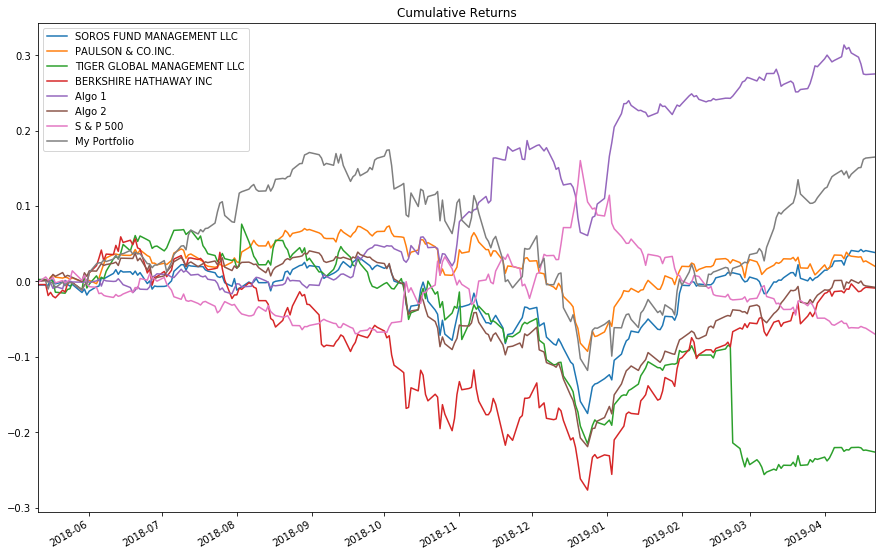

In [174]:
new_cumlative_returns = (1 + new_combined_df).cumprod() -1
new_cumlative_returns.plot(figsize=(15,10), title='Cumulative Returns')

In [175]:
new_risk = new_combined_df.std()
new_risk.sort_values()

PAULSON & CO.INC.              0.007350
Algo 1                         0.008419
Algo 2                         0.008769
SOROS FUND MANAGEMENT LLC      0.009234
S & P 500                      0.009584
My Portfolio                   0.013331
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
dtype: float64

### Re-run the Rolling Statistics

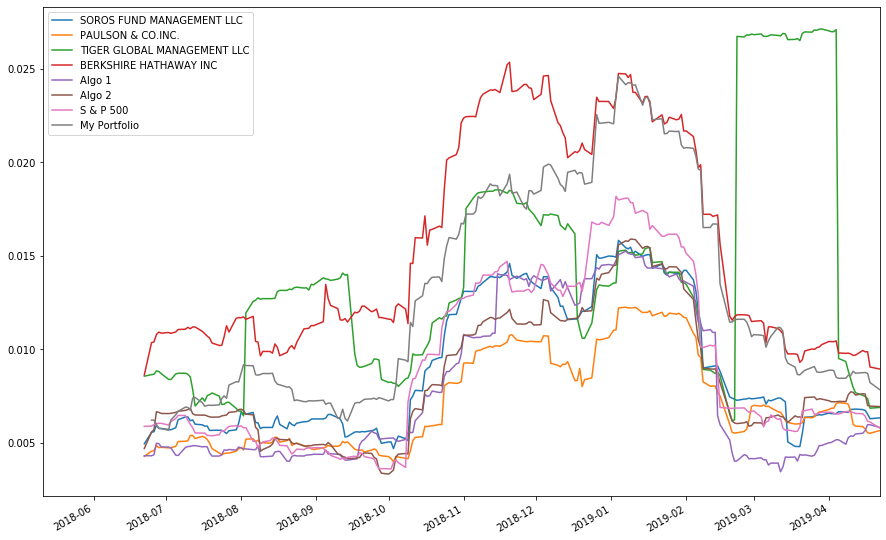

In [177]:
new_combined_df.rolling(window=30).std().plot(figsize=(15,10))